# Bike Sharing Assignement

Submitted by **Debadutta Pahadsing**

Date **14-Sep-2022**

## Business Understanding

#### What is Bike Sharing System

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

#### What is the problem being faced by BoomBikes (Bike Sharing Company)

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

#### What information BoomBikes is looking for?

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They want to understand the factors on which the demand for these shared bikes depends, viz.:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### About the Source of the Data
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Problem Statement

**To model the demand for shared bikes with the available independent variables to understand how exactly the demands vary with different features.**


### Percieved Benefits

- BoomBikes can accordingly manipulate the business strategy to meet the demand levels and meet the customer's
- expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market

## Import Required Libraries

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# libraries for data processing and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for machine learning 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Read Data

In [4]:
df = pd.read_csv('day.csv')

## Data Quality Check

In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# there are no missing values

# column data types seem appropriate, except 'dteday', which sould be datetime

In [8]:
# convert the datatype of 'dteday' to datetime

df.dteday = pd.DatetimeIndex(df.dteday)
df.dteday.dtype

dtype('<M8[ns]')

In [9]:
# check out a frew rows from the top

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# list the column names - will be helpful in copy-pasting 

df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
# rename the columns to more aapropriate name based on the data-dictionary

df.rename(columns={
    'dteday':'date', 
    'season':'season', 
    'yr':'year', 
    'mnth':'month', 
    'holiday':'is_holiday', 
    'weekday':'day_of_week',
    'workingday':'is_working_day', 
    'weathersit':'weather_type', 
    'temp':'temp_actl', 
    'atemp':'temp_feels_like', 
    'hum':'humidity', 
    'windspeed':'wind_speed',
    'casual':'cnt_casual', 
    'registered':'cnt_regd', 
    'cnt':'cnt_total'
}, inplace=True)

In [12]:
# 'month', 'day_of_week', 'season' and 'weather_type' have numbers as values, but they are actually categorical data 

# map/convert 'month', 'day_of_week', 'season' and 'weather_type' 
# to string categorical variables based on understanding from the data dictionary

dict_map_season = {1:'1_spring', 2:'2_summer', 3:'3_fall', 4:'4_winter'}
dict_map_weather_type = {1:'clear', 2:'misty', 3:'snowy', 4:'rainy'}
dict_map_month = {1:'mon01_jan', 2:'mon02_feb', 3:'mon03_mar', 4:'mon04_apr', 5:'mon05_may', 6:'mon06_jun', 
                  7:'mon07_jul', 8:'mon08_aug', 9:'mon09_sep', 10:'mon10_oct', 11:'mon11_nov', 12:'mon12_dec'}
dict_map_day_of_week = {0: 'day0_sun', 1:'day1_mon', 2:'day2_tue', 3:'day3_wed', 4:'day4_thu', 5:'day5_fri', 6:'day6_sat'}

df.season = df.season.map(dict_map_season)
df.weather_type = df.weather_type.map(dict_map_weather_type)
df['month_name'] = df.month.map(dict_map_month)
df.day_of_week = df.day_of_week.map(dict_map_day_of_week)

In [13]:
# check out the 'instant' (record index)

df.instant.nunique()

730

In [14]:
# 'instant' can be dropped, as it is the row index and not an useful predictor for bike demand

df.drop(columns=['instant'], inplace=True)

## Derived Metrics

In [15]:
# let's derive a new variable called 'is_weekend'
# this may be useful for analysing demand trends between weekdays and weekends

df['is_weekend'] = df.day_of_week.apply(lambda x : 1 if (x=='day0_sun' or x=='day6_sat') else 0)

In [16]:
# let's derive a new variable called 'year_month' by concatenating 'year' and 'month'
# this may be useful for analysing data by months over the two year period (2018-2019)

df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).apply(lambda x : x.rjust(2,'0'))

## Exploratory Data Analysis

In [17]:
#let's check the summary statistics

df.describe()

,year,month,is_holiday,is_working_day,temp_actl,temp_feels_like,humidity,wind_speed,cnt_casual,cnt_regd,cnt_total,is_weekend
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,0.287671
std,0.500343,3.450215,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,0.452987
min,0.000000,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,0.000000
25%,0.000000,4.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,0.000000
50%,0.500000,7.000000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,0.000000
75%,1.000000,10.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,1.000000
max,1.000000,12.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,1.000000


In [18]:
# we can see in the summary statistics that the mean and median are quite close for numerical variables

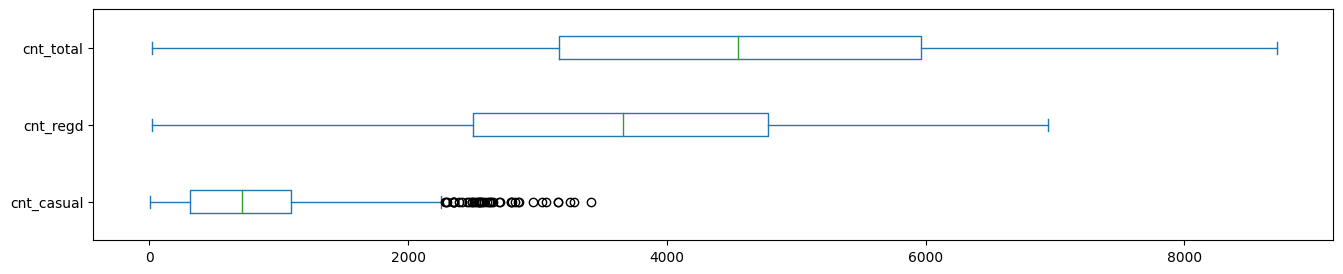

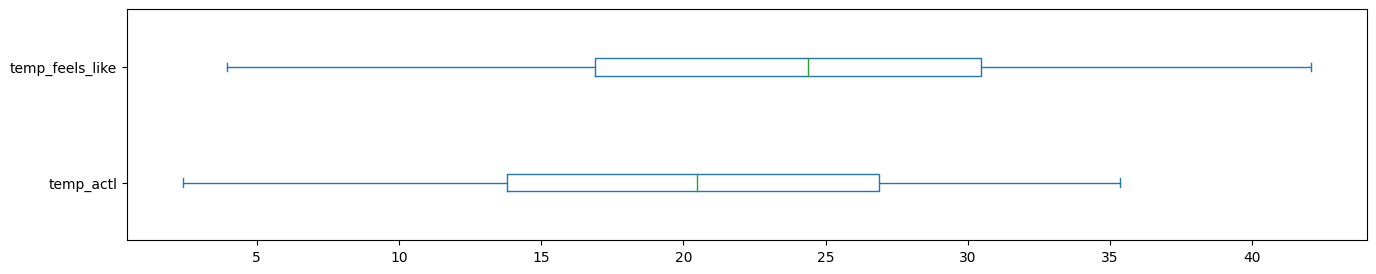

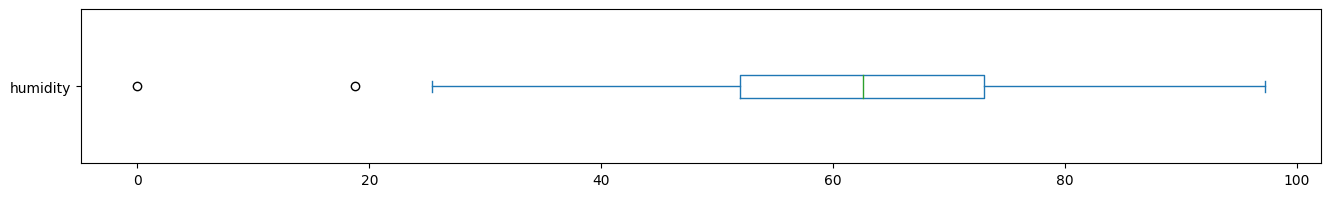

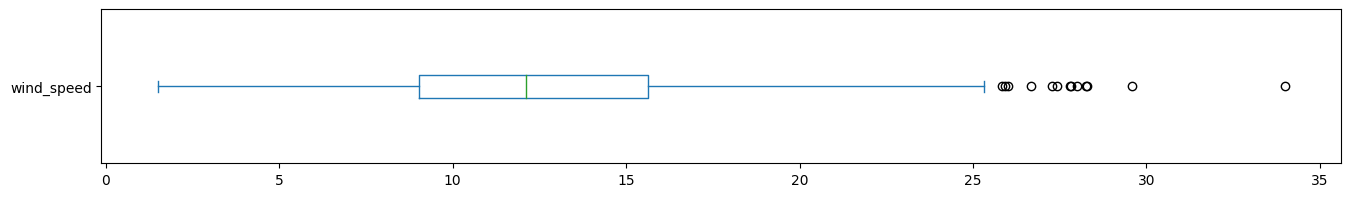

In [19]:
# let's check the boxplot to see if there are any Outliers in the numerical variables

df[['cnt_casual', 'cnt_regd', 'cnt_total']].plot.box(vert=False, figsize=(16,3));
df[['temp_actl', 'temp_feels_like']].plot.box(vert=False, figsize=(16,3));
df[['humidity']].plot.box(vert=False, figsize=(16,2));
df[['wind_speed']].plot.box(vert=False, figsize=(16,2));

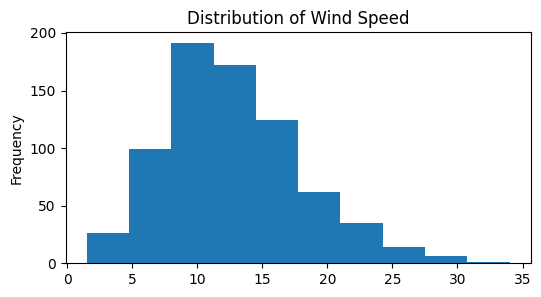

In [20]:
df.wind_speed.plot(kind='hist', title='Distribution of Wind Speed', figsize=(6,3));

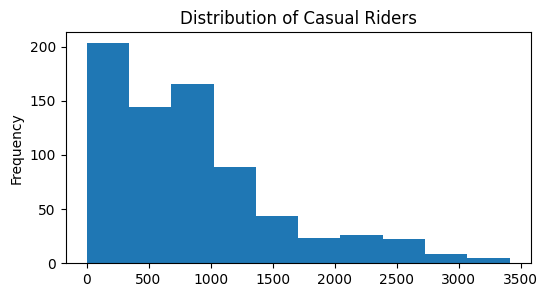

In [21]:
df.cnt_casual.plot(kind='hist', title='Distribution of Casual Riders', figsize=(6,3));

In [22]:
# there are a few outliers in the count of casual riders and wind speed
# the distrubution for the same is therefore slightly skewed

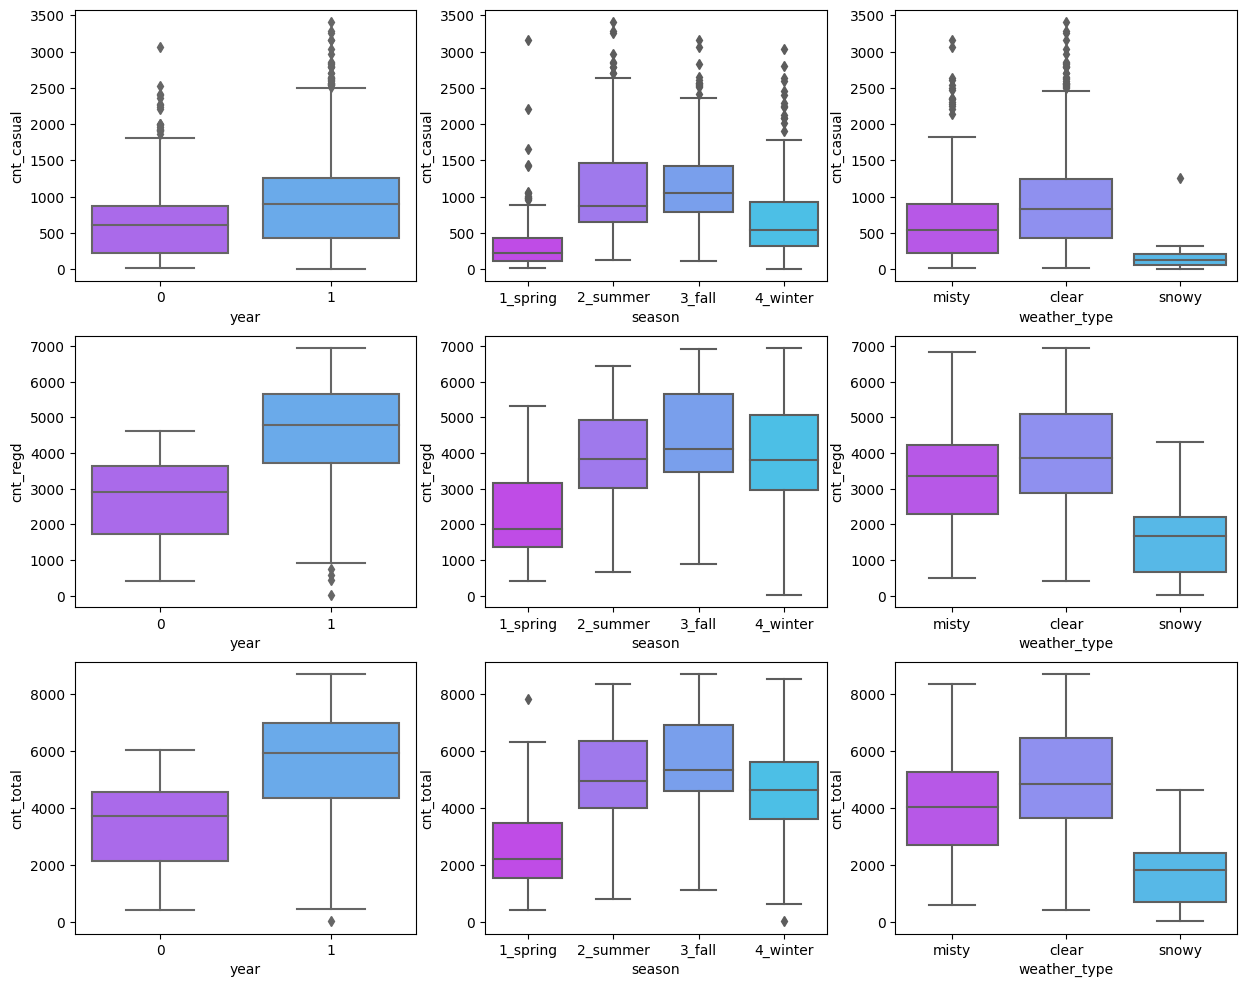

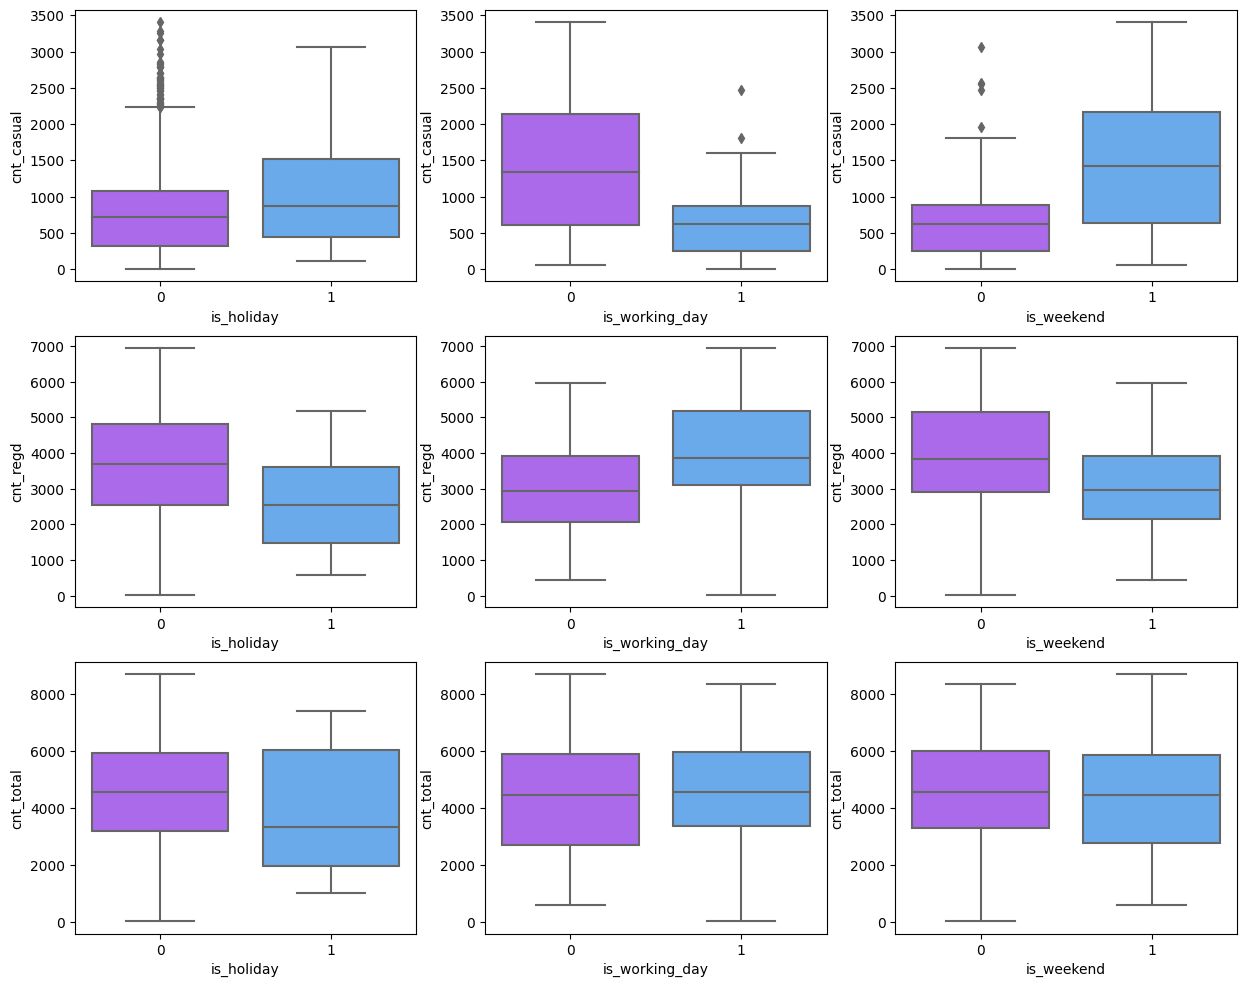

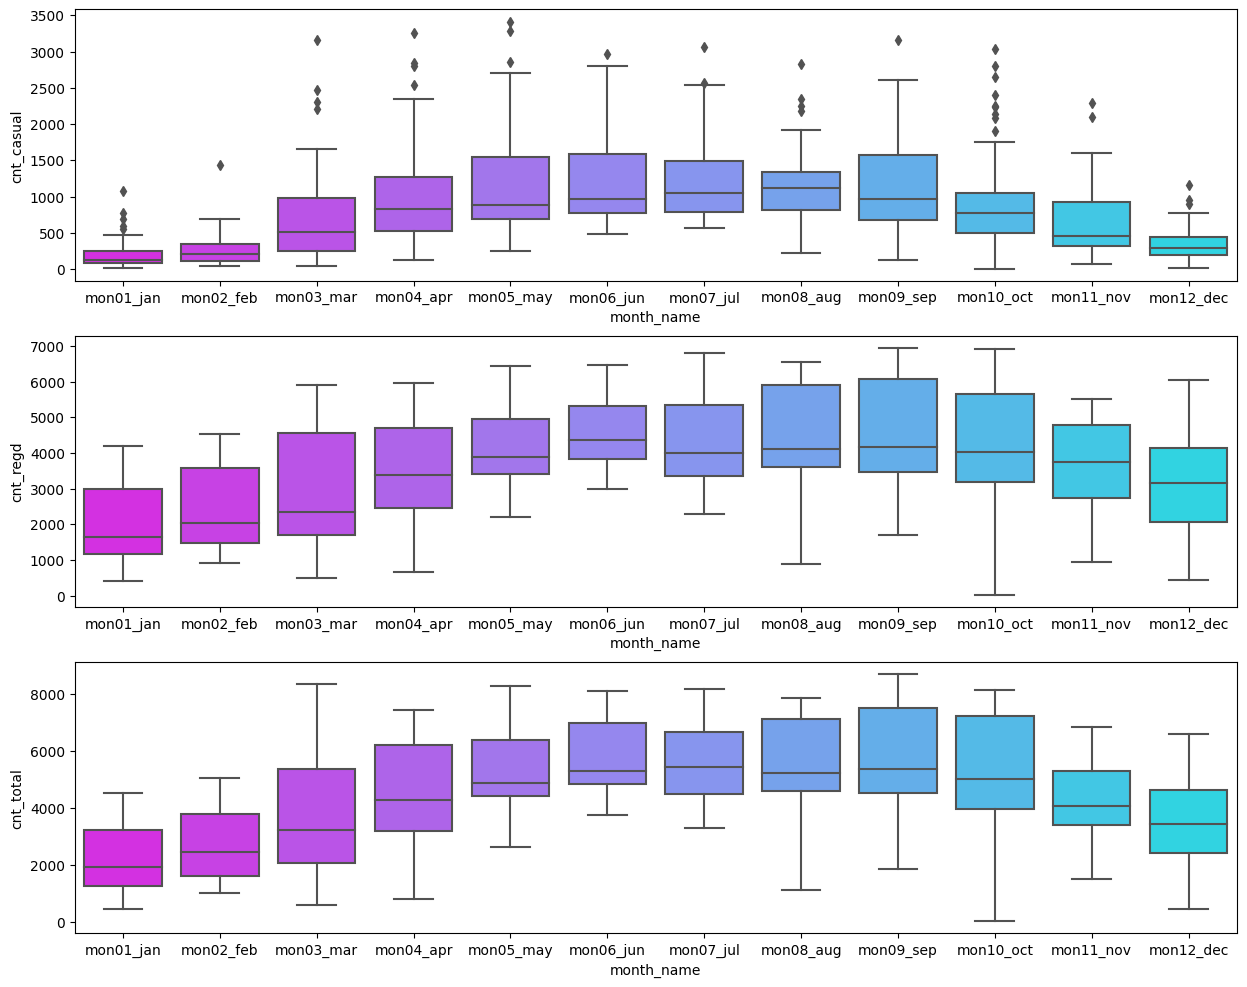

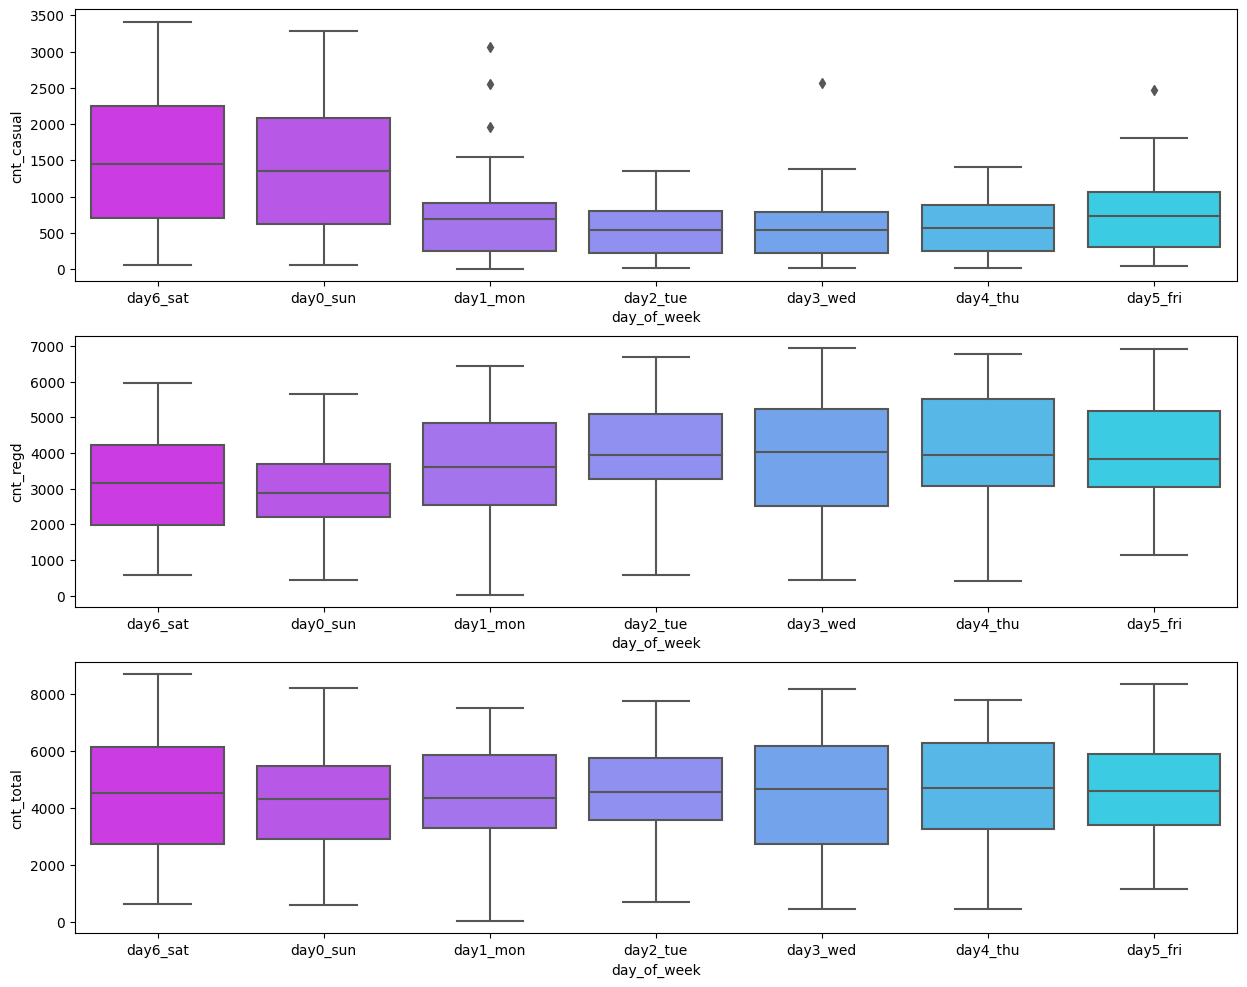

In [23]:
figure, axes = plt.subplots(3, 3, figsize=(15, 12))
for idx_row, row in enumerate(['cnt_casual', 'cnt_regd', 'cnt_total'], 0):
    for idx_col, col in enumerate(['year', 'season', 'weather_type'], 0):
        sns.boxplot(x=col, y=row, data=df, ax=axes[idx_row, idx_col], palette='cool_r')

figure, axes = plt.subplots(3, 3, figsize=(15, 12))
for idx_row, row in enumerate(['cnt_casual', 'cnt_regd', 'cnt_total'], 0):
    for idx_col, col in enumerate(['is_holiday', 'is_working_day', 'is_weekend'], 0):
        sns.boxplot(x=col, y=row, data=df, ax=axes[idx_row, idx_col], palette='cool_r')        

figure, axes = plt.subplots(3, 1, figsize=(15, 12))
for idx_row, row in enumerate(['cnt_casual', 'cnt_regd', 'cnt_total'], 0):
    for idx_col, col in enumerate(['month_name'], 0):
        sns.boxplot(x=col, y=row, data=df, ax=axes[idx_row], palette='cool_r')        

figure, axes = plt.subplots(3, 1, figsize=(15, 12))
for idx_row, row in enumerate(['cnt_casual', 'cnt_regd', 'cnt_total'], 0):
    for idx_col, col in enumerate(['day_of_week'], 0):
        sns.boxplot(x=col, y=row, data=df, ax=axes[idx_row], palette='cool_r')

In [24]:
# there is a significant jump in riders (all types) from year 2018 (0) to 2019 (1)

# average no. of riders (all types) is most during the fall and least in the spring
# average no. of riders (all types) per season in descending order are fall, summer, winter, spring

# average no. of riders (all types) is most on clear days and least on the snowy days
# average no. of casual riders is very low on snowy days

# average no. of riders is less on holidays compared to non-holidays
# average no. of riders is similar on working days compared to non-working days
# average no. of riders is similar on weekends compared to non-weekends
# average no. of all riders show similar patterns for every day of week

# average no. of riders (all types) is most during may and oct
# beyond may and oct, the demand gradually falls on both sides of the distribution 


# bike demand has substantially grown from 2018 to 2019
# bike demand is less on holidays 
# bike demand is more on clear days and goes down as the weather condition worsens
# bike demand is high during summer & fall, and low during spring and winter

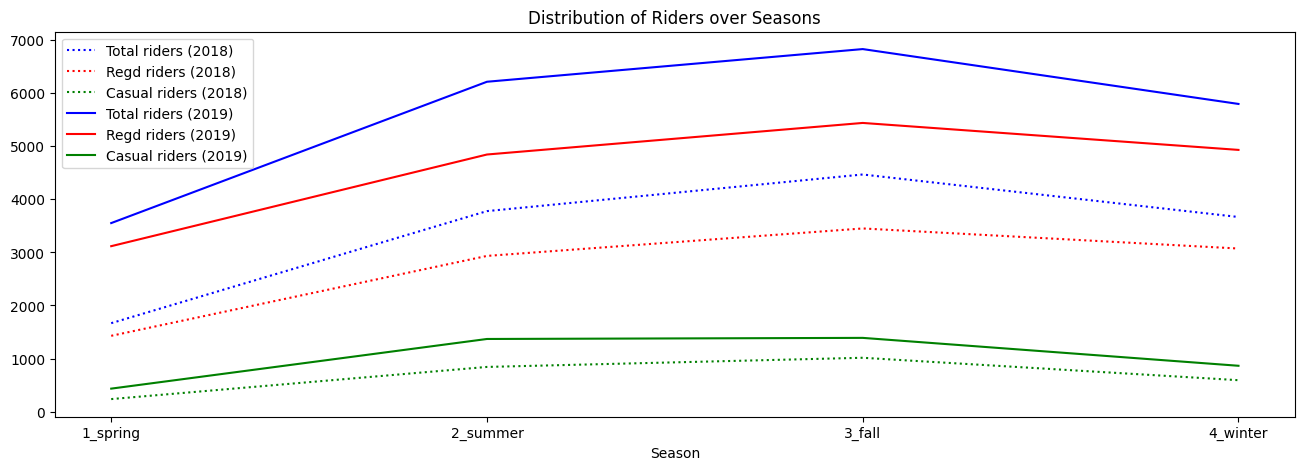

In [25]:
plt.figure(figsize=(16,5))
df_grp = df[df.year==0].groupby(by=['season'])['cnt_total'].aggregate(['mean']).reset_index()
plt.plot(df_grp['season'], df_grp['mean'], color='blue', ls=':')
df_grp = df[df.year==0].groupby(by='season')['cnt_regd'].aggregate(['mean']).reset_index()
plt.plot(df_grp['season'], df_grp['mean'], color='red', ls=':')
df_grp = df[df.year==0].groupby(by='season')['cnt_casual'].aggregate(['mean']).reset_index()
plt.plot(df_grp['season'], df_grp['mean'], color='green', ls=':')

df_grp = df[df.year==1].groupby(by=['season'])['cnt_total'].aggregate(['mean']).reset_index()
plt.plot(df_grp['season'], df_grp['mean'], color='blue')
df_grp = df[df.year==1].groupby(by='season')['cnt_regd'].aggregate(['mean']).reset_index()
plt.plot(df_grp['season'], df_grp['mean'], color='red')
df_grp = df[df.year==1].groupby(by='season')['cnt_casual'].aggregate(['mean']).reset_index()
plt.plot(df_grp['season'], df_grp['mean'], color='green')
plt.title('Distribution of Riders over Seasons')
plt.legend(['Total riders (2018)', 'Regd riders (2018)', 'Casual riders (2018)',
           'Total riders (2019)', 'Regd riders (2019)', 'Casual riders (2019)'])
plt.xlabel('Season')
plt.show()

In [26]:
# bike demand is high during summer & fall, and low during spring and winter
# bike demand by casual riders, regd riders and total riders has similar patterns and appears to be strongly correlated

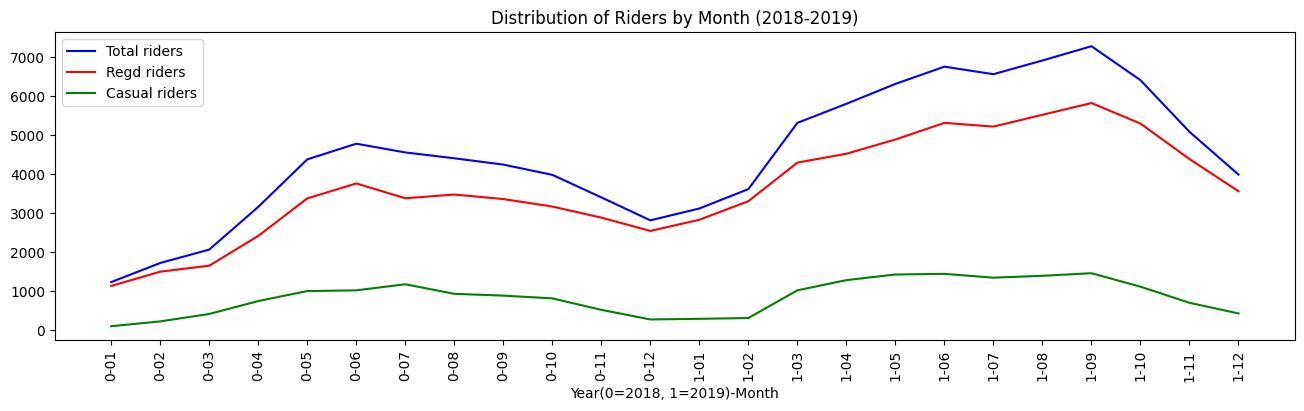

In [27]:
plt.figure(figsize=(16,4))
df_grp = df.groupby(by='year_month')['cnt_total'].aggregate(['mean']).reset_index()
plt.plot(df_grp['year_month'], df_grp['mean'], color='blue')
df_grp = df.groupby(by='year_month')['cnt_regd'].aggregate(['mean']).reset_index()
plt.plot(df_grp['year_month'], df_grp['mean'], color='red')
df_grp = df.groupby(by='year_month')['cnt_casual'].aggregate(['mean']).reset_index()
plt.plot(df_grp['year_month'], df_grp['mean'], color='green')
plt.xticks(rotation ='vertical')
plt.title('Distribution of Riders by Month (2018-2019)')
plt.legend(['Total riders', 'Regd riders', 'Casual riders'])
plt.xlabel('Year(0=2018, 1=2019)-Month')

plt.show()

In [28]:
# bike demand is high during may & oct, and falls gradually on either side
# bike demand by casual riders, regd riders and total riders has increased from 2018 to 2019
# bike demand by casual riders, regd riders and total riders has similar patterns in each year

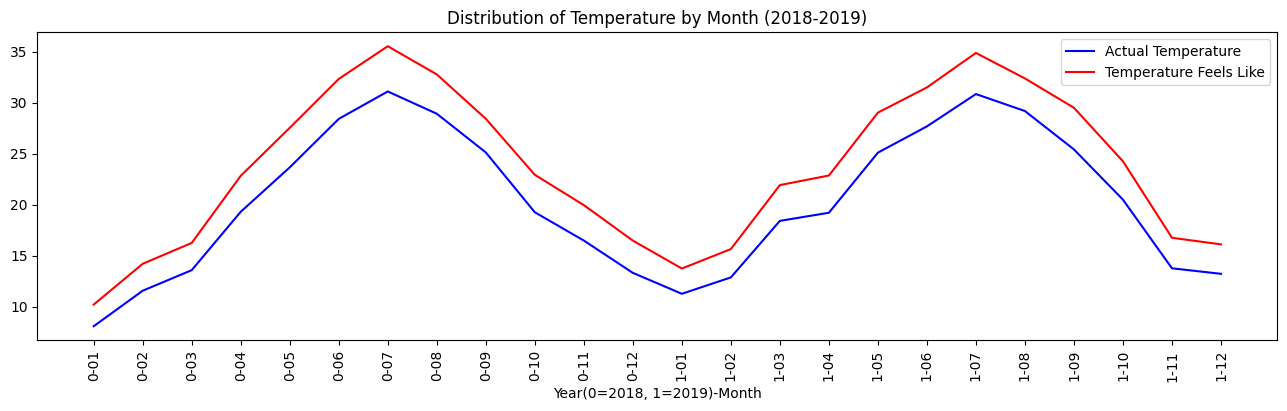

In [29]:
plt.figure(figsize=(16,4))
df_grp = df.groupby(by='year_month')['temp_actl'].aggregate(['mean']).reset_index()
plt.plot(df_grp['year_month'], df_grp['mean'], color='blue')
df_grp = df.groupby(by='year_month')['temp_feels_like'].aggregate(['mean']).reset_index()
plt.plot(df_grp['year_month'], df_grp['mean'], color='red')
plt.xticks(rotation ='vertical')
plt.title('Distribution of Temperature by Month (2018-2019)')
plt.legend(['Actual Temperature', 'Temperature Feels Like'])
plt.xlabel('Year(0=2018, 1=2019)-Month')
plt.show()

In [30]:
# temperature distribution is almost identical in both the years
# the temp_actl and temp_feels_like seems highly correlated

In [31]:
# let's check the correlation among temp_actl, temp_feels_like and target

In [32]:
df[['temp_actl', 'temp_feels_like', 'cnt_total']].corr()

,temp_actl,temp_feels_like,cnt_total
temp_actl,1.000000,0.991696,0.627044
temp_feels_like,0.991696,1.000000,0.630685
cnt_total,0.627044,0.630685,1.000000


In [33]:
# we can see temp_actl and temp_feels_like seems highly correlated
# temp_feels_like has slightly better correlation with the target

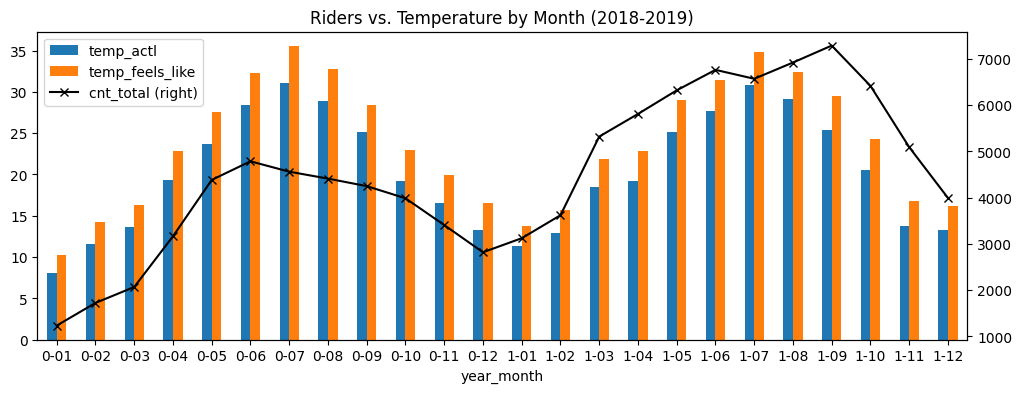

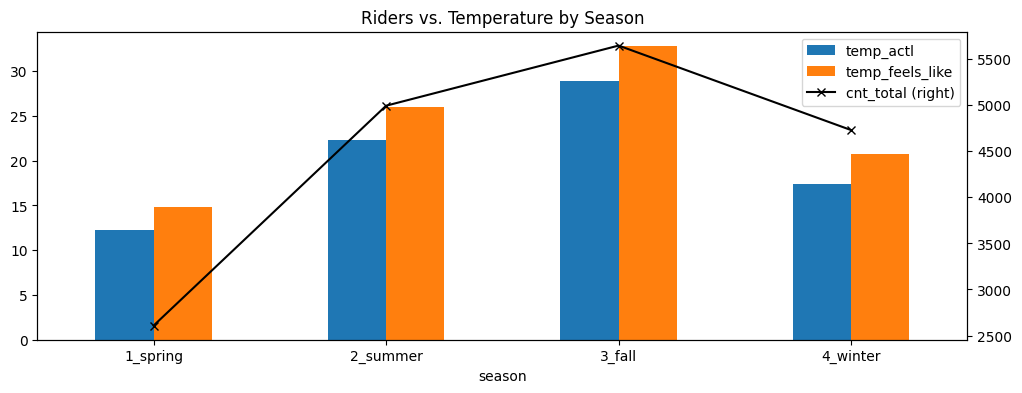

In [34]:
fig, ax1 = plt.subplots(figsize=(12, 4))
df_grp = df.groupby(by='year_month')[['temp_actl', 'temp_feels_like', 'cnt_total']].mean().reset_index()
df_grp.plot(kind='bar', x='year_month', y=['temp_actl','temp_feels_like'], ax=ax1)
df_grp.plot(kind='line', x='year_month', y=['cnt_total'], marker='x', color='black', secondary_y=True, ax=ax1)
plt.xticks(rotation ='vertical')
plt.title('Riders vs. Temperature by Month (2018-2019)')
plt.xlabel('Year(0=2018, 1=2019)-Month')
plt.show()

fig, ax1 = plt.subplots(figsize=(12, 4))
df_grp = df.groupby(by='season')[['temp_actl', 'temp_feels_like', 'cnt_total']].mean().reset_index()
df_grp.plot(kind='bar', x='season', y=['temp_actl','temp_feels_like'], ax=ax1)
df_grp.plot(kind='line', x='season', y=['cnt_total'], marker='x', color='black', secondary_y=True, ax=ax1)
plt.xticks(rotation ='vertical')
plt.title('Riders vs. Temperature by Season')
plt.xlabel('Season')
plt.show()

In [35]:
# within a year, temperature is higher during summer and fall, so is the bike demand
# strong +ve correlation between temperature and bike demand

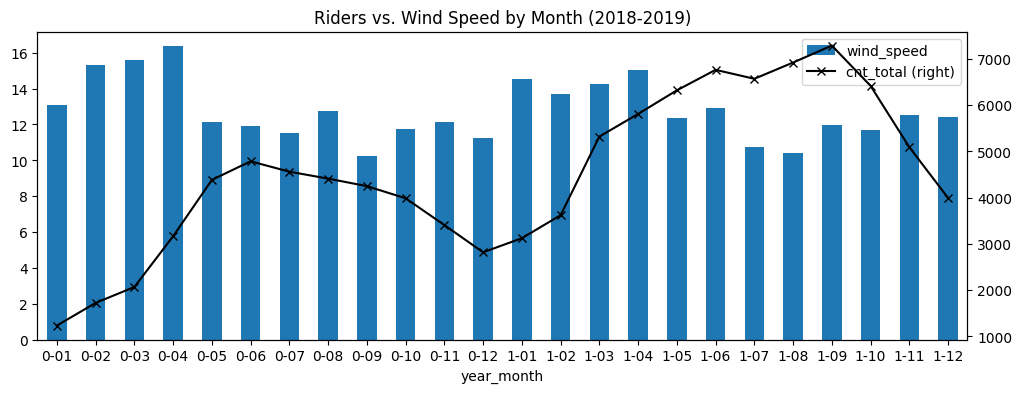

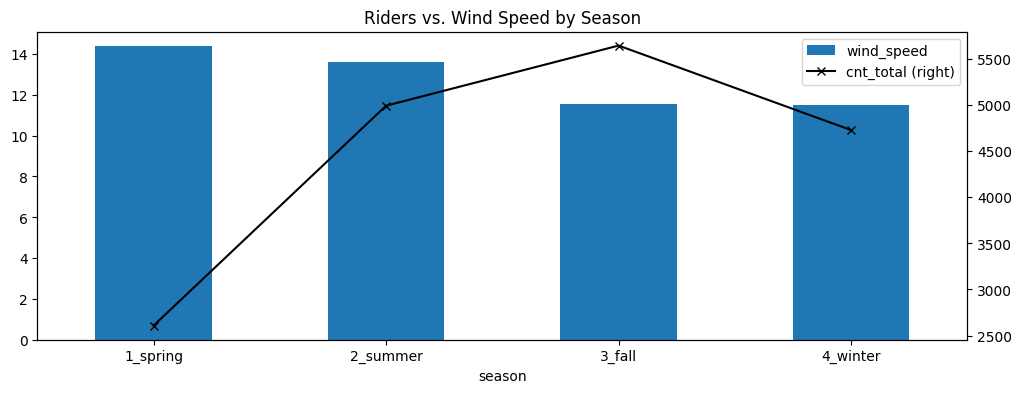

In [36]:
fig, ax1 = plt.subplots(figsize=(12, 4))
df_grp = df.groupby(by='year_month')[['wind_speed', 'cnt_total']].mean().reset_index()
df_grp.plot(kind='bar', x='year_month', y=['wind_speed'], ax=ax1)
df_grp.plot(kind='line', x='year_month', y=['cnt_total'], marker='x', color='black', secondary_y=True, ax=ax1)
plt.xticks(rotation ='vertical')
plt.title('Riders vs. Wind Speed by Month (2018-2019)')
plt.xlabel('Year(0=2018, 1=2019)-Month')
plt.show()

fig, ax1 = plt.subplots(figsize=(12, 4))
df_grp = df.groupby(by='season')[['wind_speed', 'cnt_total']].mean().reset_index()
df_grp.plot(kind='bar', x='season', y=['wind_speed'], ax=ax1)
df_grp.plot(kind='line', x='season', y=['cnt_total'], marker='x', color='black', secondary_y=True, ax=ax1)
plt.xticks(rotation ='vertical')
plt.title('Riders vs. Wind Speed by Season')
plt.xlabel('Season')
plt.show()

In [37]:
# within a year, wind speed is lowest during fall, bike demand is the highest
# some degree of -ve correlation between wind speed and bike demand

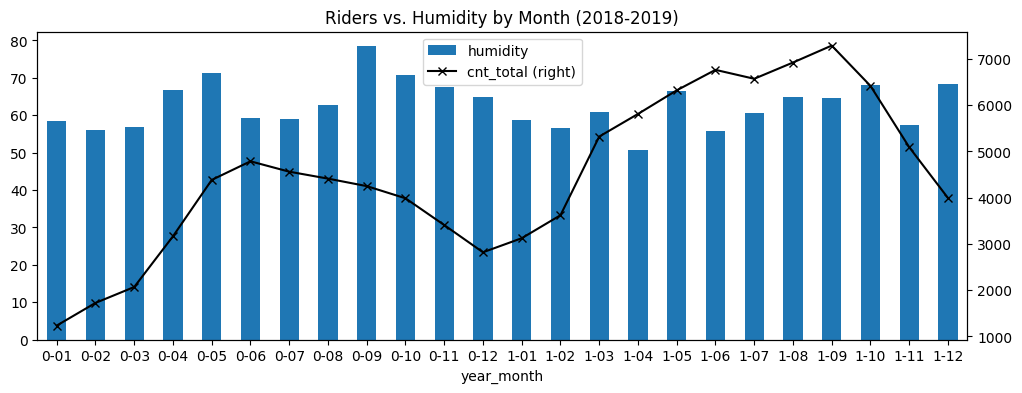

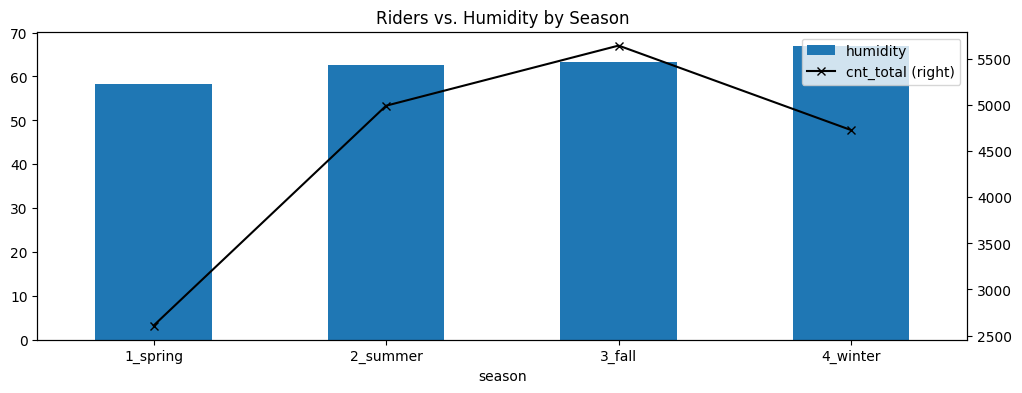

In [38]:
fig, ax1 = plt.subplots(figsize=(12, 4))
df_grp = df.groupby(by='year_month')[['humidity', 'cnt_total']].mean().reset_index()
df_grp.plot(kind='bar', x='year_month', y=['humidity'], ax=ax1)
df_grp.plot(kind='line', x='year_month', y=['cnt_total'], marker='x', color='black', secondary_y=True, ax=ax1)
plt.xticks(rotation ='vertical')
plt.title('Riders vs. Humidity by Month (2018-2019)')
plt.xlabel('Year(0=2018, 1=2019)-Month')
plt.show()

fig, ax1 = plt.subplots(figsize=(12, 4))
df_grp = df.groupby(by='season')[['humidity', 'cnt_total']].mean().reset_index()
df_grp.plot(kind='bar', x='season', y=['humidity'], ax=ax1)
df_grp.plot(kind='line', x='season', y=['cnt_total'], marker='x', color='black', secondary_y=True, ax=ax1)
plt.xticks(rotation ='vertical')
plt.title('Riders vs. Humidity by Season')
plt.xlabel('Season')
plt.show()

In [39]:
# seems practically no/ very weak correlation between humidity and bike demand

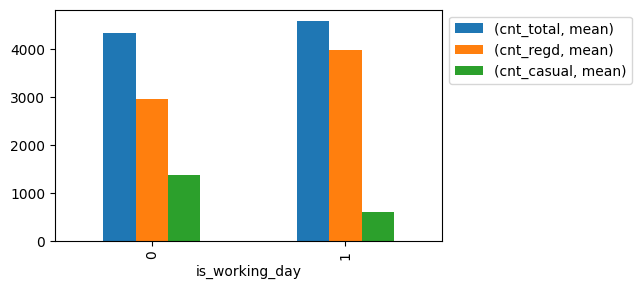

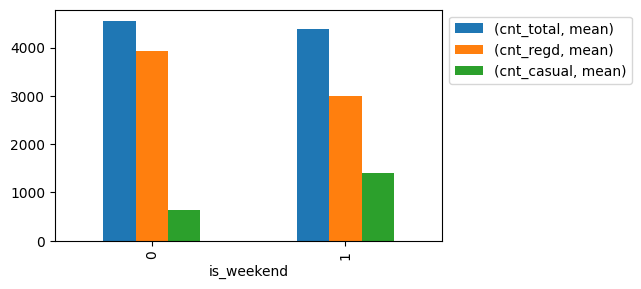

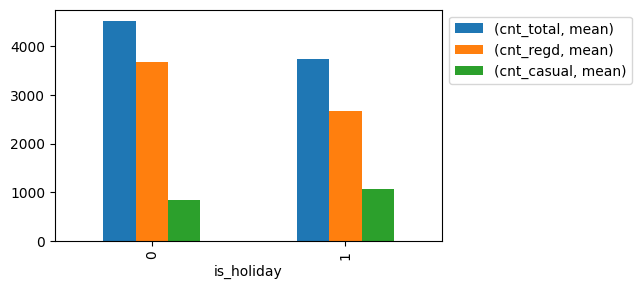

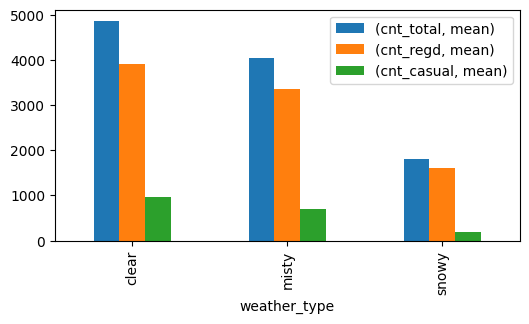

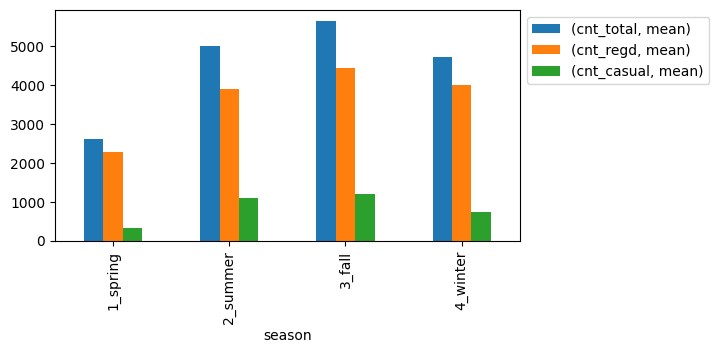

In [40]:
df_grp = df.groupby(by='is_working_day')[['cnt_total', 'cnt_regd', 'cnt_casual']].aggregate(['mean']).reset_index()
fig = df_grp.plot.bar(x='is_working_day', figsize=(5,3))
fig.legend(bbox_to_anchor=(1,1))

df_grp = df.groupby(by='is_weekend')[['cnt_total', 'cnt_regd', 'cnt_casual']].aggregate(['mean']).reset_index()
fig = df_grp.plot.bar(x='is_weekend', figsize=(5,3))
fig.legend(bbox_to_anchor=(1,1))

df_grp = df.groupby(by='is_holiday')[['cnt_total', 'cnt_regd', 'cnt_casual']].aggregate(['mean']).reset_index()
fig = df_grp.plot.bar(x='is_holiday', figsize=(5,3))
fig.legend(bbox_to_anchor=(1,1))

df_grp = df.groupby(by='weather_type')[['cnt_total', 'cnt_regd', 'cnt_casual']].aggregate(['mean']).reset_index()
fig = df_grp.plot.bar(x='weather_type', figsize=(6,3))
fig.legend(bbox_to_anchor=(1,1))

df_grp = df.groupby(by='season')[['cnt_total', 'cnt_regd', 'cnt_casual']].aggregate(['mean']).reset_index()
fig = df_grp.plot.bar(x='season', figsize=(6,3))
fig.legend(bbox_to_anchor=(1,1))

plt.show()

In [41]:
# bike demand is lower on holidays
# bike demand decreases with bad weather
# bike demand is higher during summer and fall

## Data Preparation

In [42]:
df.columns

Index(['date', 'season', 'year', 'month', 'is_holiday', 'day_of_week',
       'is_working_day', 'weather_type', 'temp_actl', 'temp_feels_like',
       'humidity', 'wind_speed', 'cnt_casual', 'cnt_regd', 'cnt_total',
       'month_name', 'is_weekend', 'year_month'],
      dtype='object')

In [43]:
# create dummy variables (one-hot encoding) the categorical column 'season' 
# use the 'drop_first = True' parameter to drop one redundant column
# n-1 dummy variables are adequate to encode n-level categories

dummy_season = pd.get_dummies(df.season, drop_first = True, prefix='season')
df = pd.concat([df, dummy_season], axis = 1)
df.drop(columns='season', inplace=True)
print(df.shape)
# df.head()

(730, 20)


In [44]:
# create dummy variables (one-hot encoding) the categorical column 'weather_type' 

dummy_weather_type = pd.get_dummies(df.weather_type, drop_first = True, prefix='weather')
df = pd.concat([df, dummy_weather_type], axis = 1)
df.drop(columns='weather_type', inplace=True)
print(df.shape)
# df.head()

(730, 21)


In [45]:
# create dummy variables (one-hot encoding) the categorical column 'month_name' 

dummy_month_name = pd.get_dummies(df.month_name, drop_first = True)
df = pd.concat([df, dummy_month_name], axis = 1)
df.drop(columns='month_name', inplace=True)
print(df.shape)
# df.head()

(730, 31)


In [46]:
# dummy_day_of_week = pd.get_dummies(df.day_of_week, drop_first = True)
# df = pd.concat([df, dummy_day_of_week], axis = 1)
# df.drop(columns='day_of_week', inplace=True)
# print(df.shape)
# df.head()

In [47]:
df.dtypes

date               datetime64[ns]
year                        int64
month                       int64
is_holiday                  int64
day_of_week                object
is_working_day              int64
temp_actl                 float64
temp_feels_like           float64
humidity                  float64
wind_speed                float64
cnt_casual                  int64
cnt_regd                    int64
cnt_total                   int64
is_weekend                  int64
year_month                 object
season_2_summer             uint8
season_3_fall               uint8
season_4_winter             uint8
weather_misty               uint8
weather_snowy               uint8
mon02_feb                   uint8
mon03_mar                   uint8
mon04_apr                   uint8
mon05_may                   uint8
mon06_jun                   uint8
mon07_jul                   uint8
mon08_aug                   uint8
mon09_sep                   uint8
mon10_oct                   uint8
mon11_nov     

In [48]:
# we can drop the following columns
# 'date' : do not seem like a potential predictor 
# 'day_of_week' : no trend/correlation with the target seen from EDA, do not seem like a potential predictor
# 'is_weekend' : no trend/correlation with the target seen from EDA, do not seem like a potential predictor
# 'is_working_day' : no trend/correlation with the target seen from EDA, do not seem like a potential predictor

# temp_actl & temp_feels_like are strongly correlated (0.99)
# drop temp_feels_like to avoid multicollinearity
# 'temp_actl' : highly correlated with 'temp_feels_like' and the later has slightly better correlation with the target

# 'month' : dummy variables already eaxtracted 
# 'year_month' : dummy variables already eaxtracted
# 'cnt_casual' & 'cnt_regd' : these are breakup of the total demand, they are not predictors

df.drop(columns=['date', 'day_of_week', 'is_weekend', 'is_working_day', 'temp_actl', 
                 'month', 'year_month', 'cnt_casual', 'cnt_regd'], inplace=True)

In [49]:
print(df.shape)

(730, 22)


In [50]:
df.columns

Index(['year', 'is_holiday', 'temp_feels_like', 'humidity', 'wind_speed',
       'cnt_total', 'season_2_summer', 'season_3_fall', 'season_4_winter',
       'weather_misty', 'weather_snowy', 'mon02_feb', 'mon03_mar', 'mon04_apr',
       'mon05_may', 'mon06_jun', 'mon07_jul', 'mon08_aug', 'mon09_sep',
       'mon10_oct', 'mon11_nov', 'mon12_dec'],
      dtype='object')

In [51]:
# Save Clean Data

df.to_csv('bike_clean.csv')

In [52]:
# read clean data
# df = pd.read_csv('bike_clean.csv', index_col=0)
# df.head()

## Split Train and Test Data

In [53]:
df.columns

Index(['year', 'is_holiday', 'temp_feels_like', 'humidity', 'wind_speed',
       'cnt_total', 'season_2_summer', 'season_3_fall', 'season_4_winter',
       'weather_misty', 'weather_snowy', 'mon02_feb', 'mon03_mar', 'mon04_apr',
       'mon05_may', 'mon06_jun', 'mon07_jul', 'mon08_aug', 'mon09_sep',
       'mon10_oct', 'mon11_nov', 'mon12_dec'],
      dtype='object')

In [54]:
# split the dataset for training (70%) and test (30%)

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [55]:
df_train.shape, df_test.shape

((510, 22), (219, 22))

### Traning Data Feature Scaling and Correlation Analysis

In [56]:
# Columns 'temp_actl', 'temp_feels_like', 'humidity', 'wind_speed', 'cnt_total' have data in diffrent scales
# let's scale the data using normalizing to bring them to a range between 0 & 1
# using MinMaxScaler for the same
# Other columnsare having 0/1 data and do not require scaling

scaler = MinMaxScaler()
cols_num = ['temp_feels_like', 'humidity', 'wind_speed', 'cnt_total']

In [57]:
df_train[cols_num] = scaler.fit_transform(df_train[cols_num])
df_train.head()

,year,is_holiday,temp_feels_like,humidity,wind_speed,cnt_total,season_2_summer,season_3_fall,season_4_winter,weather_misty,...,mon03_mar,mon04_apr,mon05_may,mon06_jun,mon07_jul,mon08_aug,mon09_sep,mon10_oct,mon11_nov,mon12_dec
653,1,0,0.501133,0.575354,0.300794,0.864243,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,0.766351,0.725633,0.264686,0.827658,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,0.465255,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0.200348,0.498067,0.663106,0.204096,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0.391735,0.504508,0.188475,0.482973,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [58]:
df_train.describe()

,year,is_holiday,temp_feels_like,humidity,wind_speed,cnt_total,season_2_summer,season_3_fall,season_4_winter,weather_misty,...,mon03_mar,mon04_apr,mon05_may,mon06_jun,mon07_jul,mon08_aug,mon09_sep,mon10_oct,mon11_nov,mon12_dec
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.343137,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.475223,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


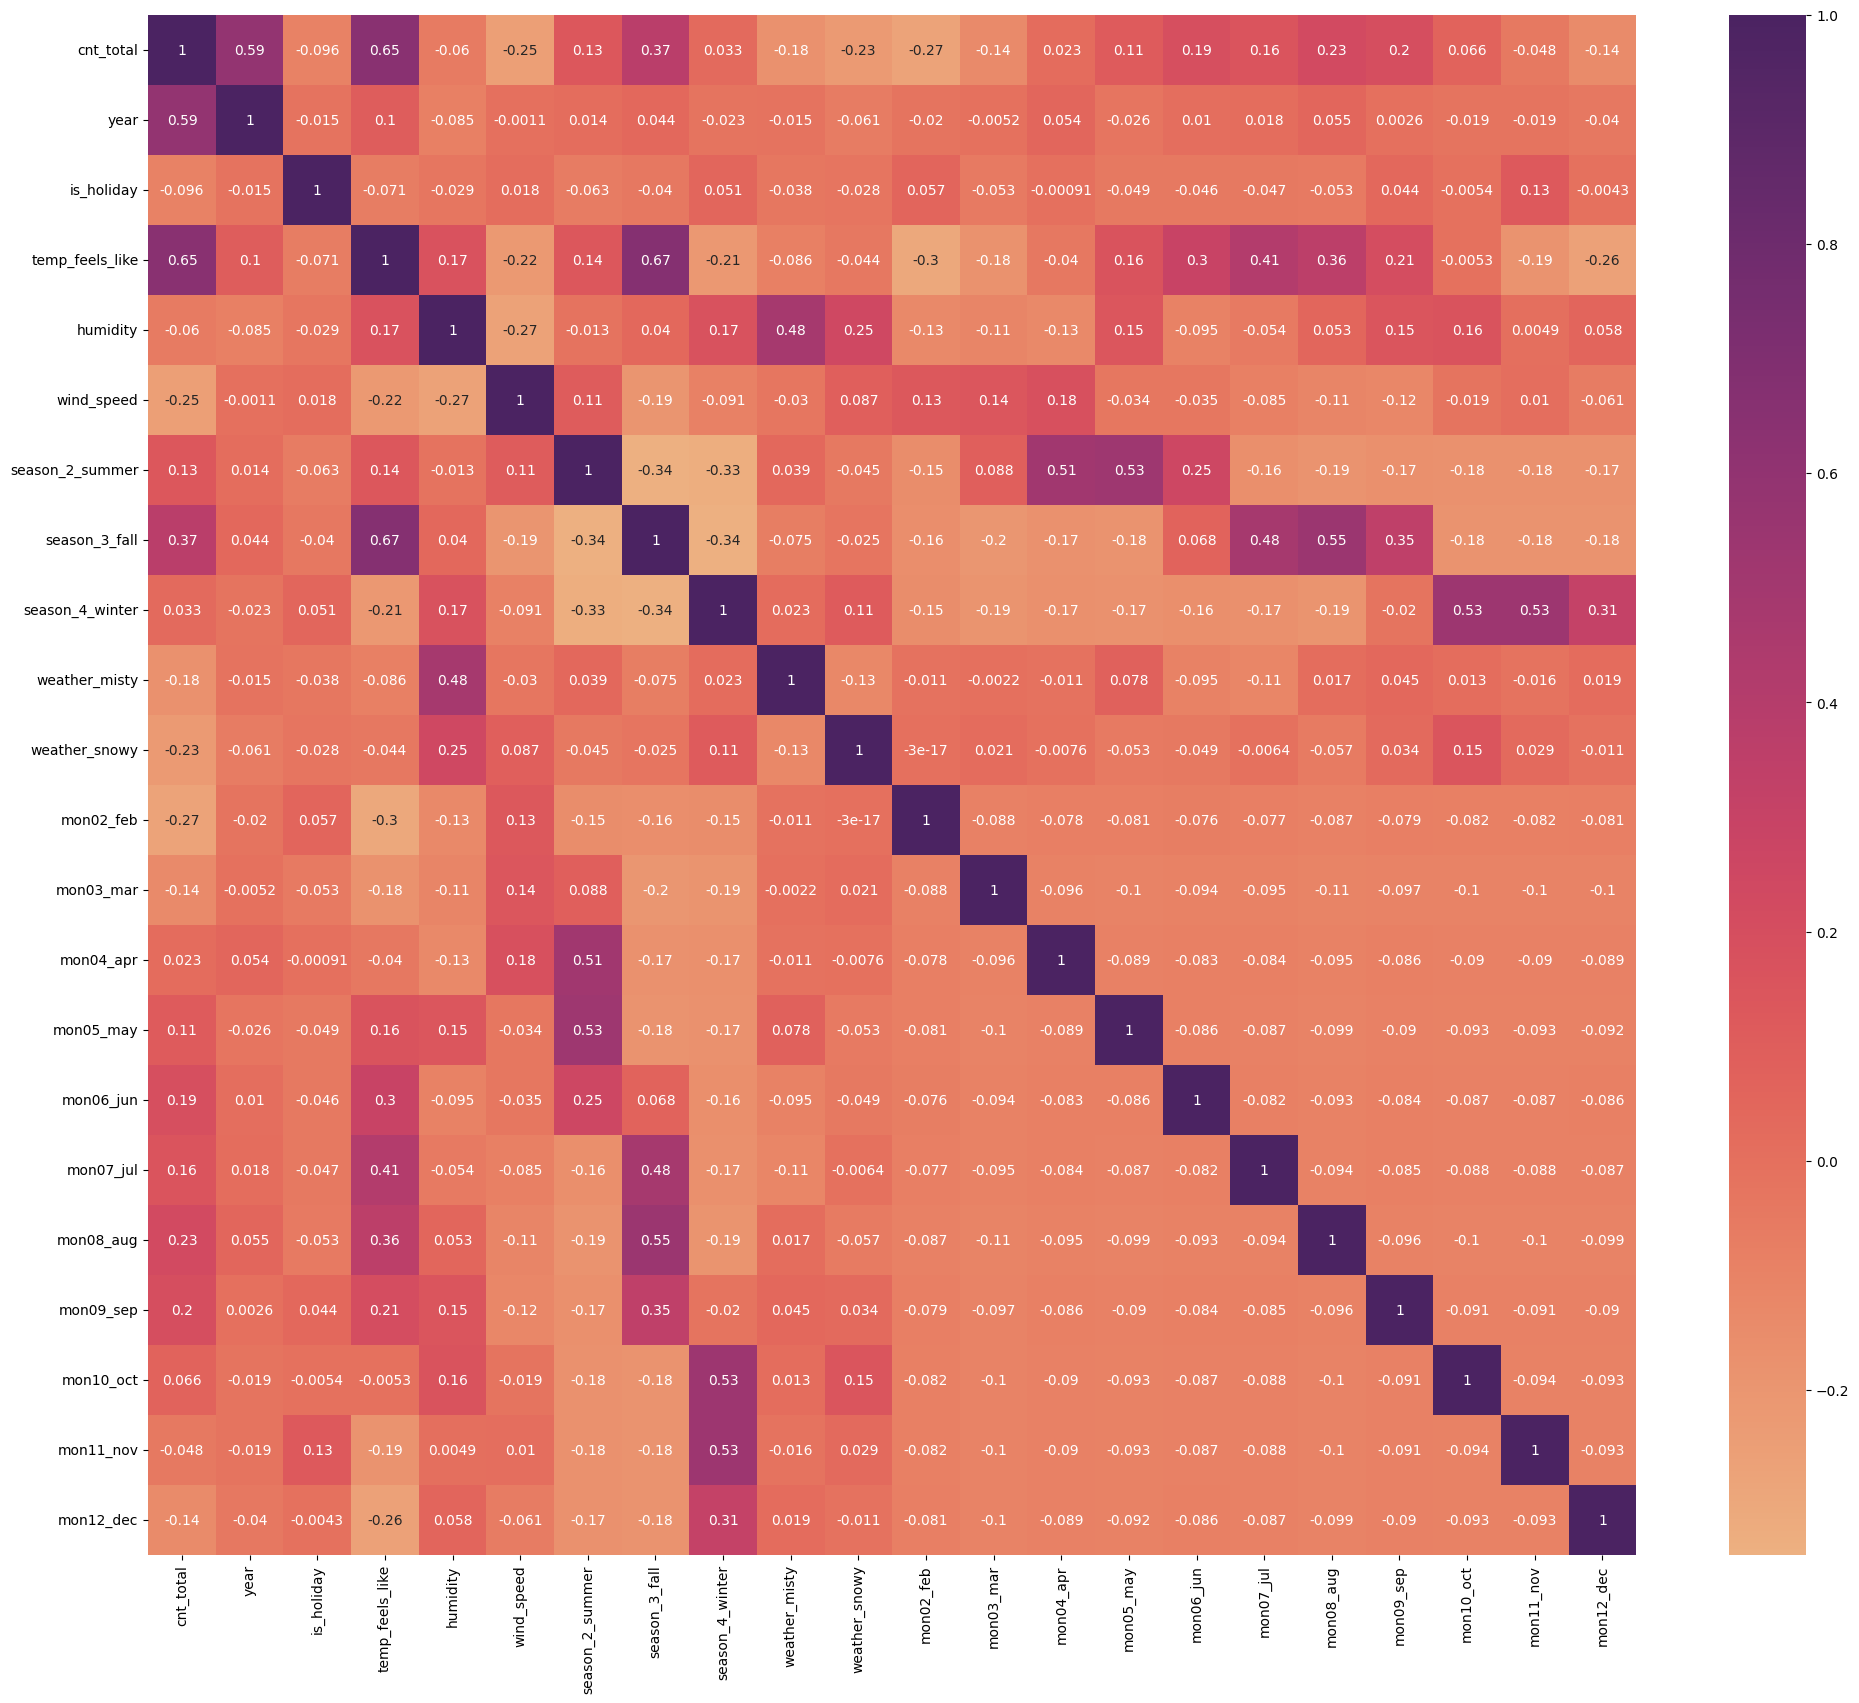

In [59]:
# plot the heatmap for the correlation matrix

df_train_target = df_train['cnt_total']
df_train_features = df_train[df_train.columns[df_train.columns != 'cnt_total']]
df_train_heatmap = pd.concat([df_train_target, df_train_features], axis=1)

plt.figure(figsize = (24, 20))
sns.heatmap(df_train_heatmap.corr(), annot = True, cmap="flare")
plt.show()

In [60]:
# target has strong +ve correlation with year, temp_feels_like, season3_fall
# target has moderate +ve correlation with month Aug & Sep
# target has moderate -ve correlation with Wind Speed, Snowy Weather, Misty Weather & Feb

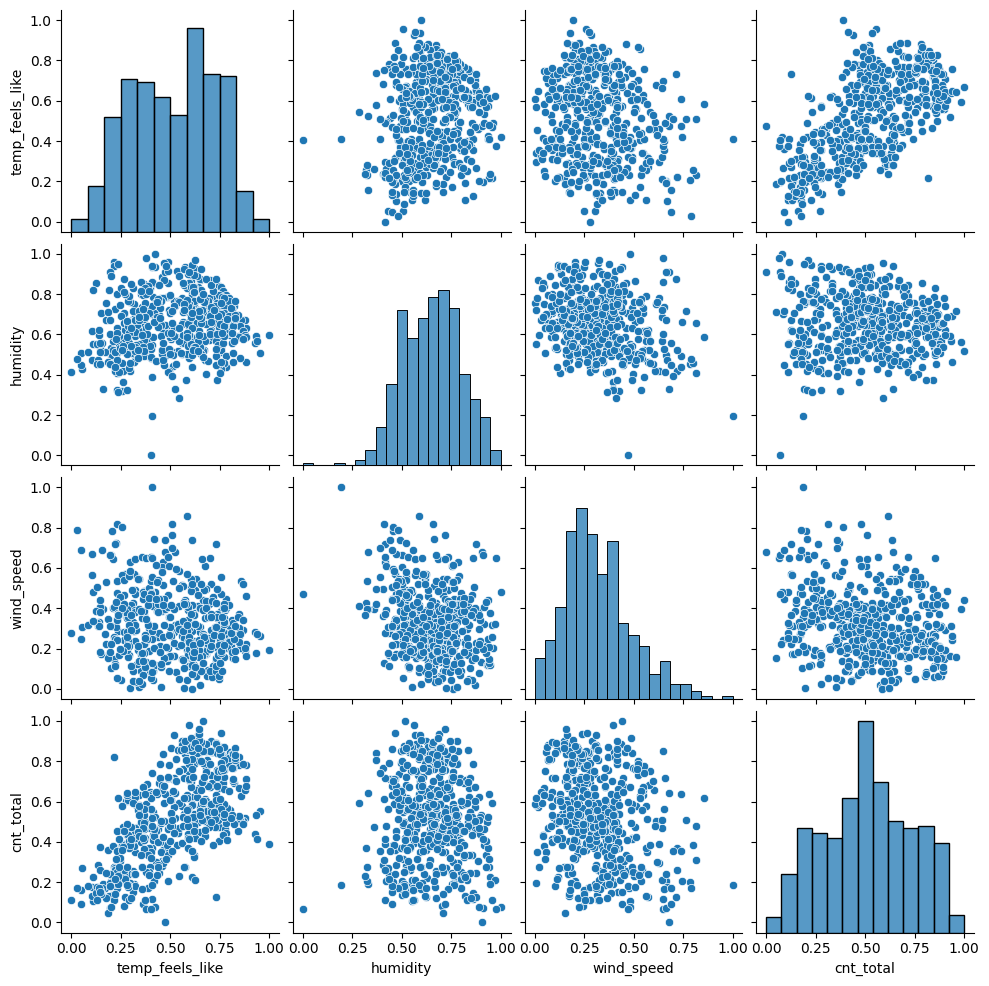

In [61]:
# visualise correlation of continuous variables in pair plot

df_pairplot = df_train[['temp_feels_like', 'humidity', 'wind_speed', 'cnt_total']]
sns.pairplot(data=df_pairplot)
plt.show()

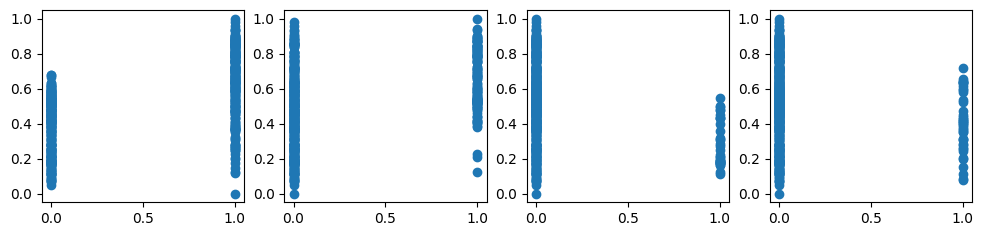

In [62]:
# visualise correlation of target and categorical variables in pair plot

plt.figure(figsize=[12,2.5])

plt.subplot(1,4,1)
plt.scatter(df_train.year, df_train.cnt_total)
plt.subplot(1,4,2)
plt.scatter(df_train.season_3_fall, df_train.cnt_total)
plt.subplot(1,4,3)
plt.scatter(df_train.mon02_feb, df_train.cnt_total)
plt.subplot(1,4,4)
plt.scatter(df_train.mon12_dec, df_train.cnt_total)

plt.show()

In [63]:
y_train = df_train.pop('cnt_total')
X_train = df_train

In [64]:
X_train.shape, y_train.shape

((510, 21), (510,))

### Test Data Feature Scaling

In [65]:
df_test.head()

,year,is_holiday,temp_feels_like,humidity,wind_speed,cnt_total,season_2_summer,season_3_fall,season_4_winter,weather_misty,...,mon03_mar,mon04_apr,mon05_may,mon06_jun,mon07_jul,mon08_aug,mon09_sep,mon10_oct,mon11_nov,mon12_dec
184,0,1,33.27085,63.7917,5.459106,6043,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,36.04875,59.2083,7.625404,6211,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,22.85230,81.2917,13.250121,2659,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,34.24915,42.4167,13.417286,4780,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,32.19710,30.5000,19.583229,4968,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [66]:
# there is no need to fit again using test data
# fit to be done using training data only
# test data is supposed to be unseen

df_test[cols_num] = scaler.transform(df_test[cols_num])
df_test.head()

,year,is_holiday,temp_feels_like,humidity,wind_speed,cnt_total,season_2_summer,season_3_fall,season_4_winter,weather_misty,...,mon03_mar,mon04_apr,mon05_may,mon06_jun,mon07_jul,mon08_aug,mon09_sep,mon10_oct,mon11_nov,mon12_dec
184,0,1,0.769660,0.657364,0.084219,0.692706,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,0.842587,0.610133,0.153728,0.712034,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,0.795343,0.437098,0.339570,0.547400,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0.741471,0.314298,0.537414,0.569029,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [67]:
df_test.describe()

,year,is_holiday,temp_feels_like,humidity,wind_speed,cnt_total,season_2_summer,season_3_fall,season_4_winter,weather_misty,...,mon03_mar,mon04_apr,mon05_may,mon06_jun,mon07_jul,mon08_aug,mon09_sep,mon10_oct,mon11_nov,mon12_dec
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,0.319635,...,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758
std,0.500722,0.188034,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,0.467403,...,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125
min,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
y_test = df_test.pop('cnt_total')
X_test = df_test

In [69]:
X_test.shape, y_test.shape

((219, 21), (219,))

## Model Building

In [70]:
X_train.shape, y_train.shape

((510, 21), (510,))

#### Althtough manual feature selection can be attempted by using the correlation of the features with the target using either Forward Selection or Backward Elimination technique, it is felt that a number of hit-and-trial would have to be performed considering there are 21 nos. of features

#### In view of the above Recursive Feature Elimination method is being followed for this assignment

### Feature Elimination using RFE

In [71]:
# Running RFE with the output number of the variable equal to 12
model_rfe = LinearRegression()
model_rfe.fit(X_train, y_train)

# running RFE
rfe = RFE(estimator=model_rfe, n_features_to_select=12, step=1)             
rfe = rfe.fit(X_train, y_train)

In [72]:
df_rfe = pd.DataFrame({'pred_name':X_train.columns, 'is_pred_selected':rfe.support_,'pred_rank':rfe.ranking_ })
df_rfe.sort_values(by='pred_rank')

,pred_name,is_pred_selected,pred_rank
0,year,True,1
9,weather_snowy,True,1
16,mon08_aug,True,1
7,season_4_winter,True,1
6,season_3_fall,True,1
8,weather_misty,True,1
4,wind_speed,True,1
3,humidity,True,1
2,temp_feels_like,True,1
1,is_holiday,True,1


In [73]:
# predictors as per RFE

col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['year', 'is_holiday', 'temp_feels_like', 'humidity', 'wind_speed',
       'season_2_summer', 'season_3_fall', 'season_4_winter', 'weather_misty',
       'weather_snowy', 'mon08_aug', 'mon09_sep'],
      dtype='object')

In [74]:
X_train.columns[~rfe.support_]

Index(['mon02_feb', 'mon03_mar', 'mon04_apr', 'mon05_may', 'mon06_jun',
       'mon07_jul', 'mon10_oct', 'mon11_nov', 'mon12_dec'],
      dtype='object')

### Model Build and Feature Elimination using p-value and VIF

In [75]:
X_train_rfe = X_train[col_rfe]

# add a constant for the intercept to the traing data, else the intercept will be zero
X_train_rfe = sm.add_constant(X_train_rfe)

In [76]:
# create function to build model using statsmodels, display model summary and display VIF values

def build_model(X_train_rfe):
    X_train_rfe = X_train_rfe.drop(['const'], axis=1)

    X_train_rfe = sm.add_constant(X_train_rfe)
    model_rfe = sm.OLS(y_train, X_train_rfe).fit()
    print(model_rfe.summary())

    X_train_vif = X_train_rfe.drop(['const'], axis=1)

    vif = pd.DataFrame()
    vif['Features'] = X_train_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

    return model_rfe

In [77]:
model_1 = build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              cnt_total   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.39e-187
Time:                        15:07:33   Log-Likelihood:                 502.01
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     497   BIC:                            -923.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2303      0.027     

,Features,VIF
2,temp_feels_like,21.66
3,humidity,15.53
6,season_3_fall,7.54
4,wind_speed,3.60
5,season_2_summer,3.30
7,season_4_winter,2.51
8,weather_misty,2.14
0,year,2.02
10,mon08_aug,1.85
11,mon09_sep,1.49


In [78]:
# 'season_3_fall' has high p-value and VIF > 5, so drop 'season_3_fall'

In [79]:
X_train_rfe = X_train_rfe.drop(columns='season_3_fall', axis=1)
model_2 = build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              cnt_total   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          9.34e-188
Time:                        15:07:33   Log-Likelihood:                 500.14
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     498   BIC:                            -925.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2301      0.027     

,Features,VIF
3,humidity,14.71
2,temp_feels_like,9.72
4,wind_speed,3.57
7,weather_misty,2.13
0,year,2.01
5,season_2_summer,1.83
6,season_4_winter,1.74
9,mon08_aug,1.55
10,mon09_sep,1.30
8,weather_snowy,1.16


In [80]:
# all p-values < 0.05, drop 'humidity' as the VIF > 5 and 
# from earlier analysis humidity does not have a strong correlation with the target
# a small drop in R^2 value may be observed

In [81]:
X_train_rfe = X_train_rfe.drop(columns='humidity', axis=1)
model_3 = build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              cnt_total   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.10e-184
Time:                        15:07:33   Log-Likelihood:                 488.96
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     499   BIC:                            -909.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1280      0.017     

,Features,VIF
2,temp_feels_like,4.91
3,wind_speed,3.05
0,year,2.00
4,season_2_summer,1.82
8,mon08_aug,1.55
5,season_4_winter,1.50
6,weather_misty,1.49
9,mon09_sep,1.30
7,weather_snowy,1.08
1,is_holiday,1.04


---
#### At this point all VIFs < 5, so level of multicollinearity is acceptable

#### All p-values < 0.05, therefore all coefficients are significant

#### Prob (F-statistic) is very small, hence the R^2 value is significant and not by chance

#### Now we have all favourable conditions, hence we can stop the iteration here

### Final Model

In [82]:
model_rfe_final = model_3
X_train_rfe_final = X_train_rfe

In [83]:
X_train_rfe_final.shape

(510, 11)

In [84]:
X_train_rfe_final.columns

Index(['const', 'year', 'is_holiday', 'temp_feels_like', 'wind_speed',
       'season_2_summer', 'season_4_winter', 'weather_misty', 'weather_snowy',
       'mon08_aug', 'mon09_sep'],
      dtype='object')

In [85]:
model_rfe_final.params

const              0.128027
year               0.233374
is_holiday        -0.093901
temp_feels_like    0.536969
wind_speed        -0.131954
season_2_summer    0.097789
season_4_winter    0.132357
weather_misty     -0.083591
weather_snowy     -0.276982
mon08_aug          0.067977
mon09_sep          0.120748
dtype: float64

#### The equation of the model is 

**riders =
0.128027 + 
(year               x 0.233374) -
(is_holiday         x 0.093901) +
(temp_feels_like    x 0.536969) -
(wind_speed         x 0.131954) +
(season_2_summer    x 0.097789) +
(season_4_winter    x 0.132357) -
(weather_misty      x 0.083591) -
(weather_snowy      x 0.276982) +
(mon08_aug          x 0.067977) +
(mon09_sep          x 0.120748)**

### Hypothesis Testing for Coefficients:
- Null Hypothesis H0:B1=B2=...=Bn=0 (Here co-efficients will be equal to zero)
- Alternate Hyposthesis H1: at least one Bi != 0 (Atleast one co-efficients will not be equal to Zero)

It is evident from model_5 summary that p-values for all coefficients are less than below the significance level of 0.05

**THEREFORE WE REJECT THE NULL HYPOTHESIS**

## Model Performance on Training Data

In [86]:
# predict using the training data

y_pred_rfe_train = model_rfe_final.predict(X_train_rfe_final)

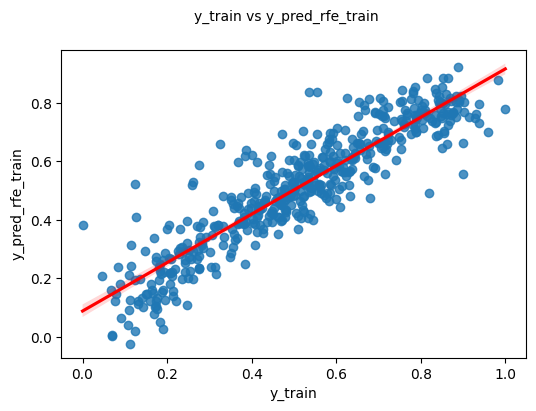

In [87]:
# Plotting y_train and y_pred_train to understand the fitting of regresion line

fig = plt.figure(figsize=(6,4))
sns.regplot(y_train, y_pred_rfe_train, line_kws={"color": "red"})
fig.suptitle('y_train vs y_pred_rfe_train', fontsize=10)
plt.xlabel('y_train', fontsize=10)
plt.ylabel('y_pred_rfe_train', fontsize=10)
plt.show()

## Residual Analysis on Training Data

### Validation of Assumption - Linear relationship between target and atleast one feature

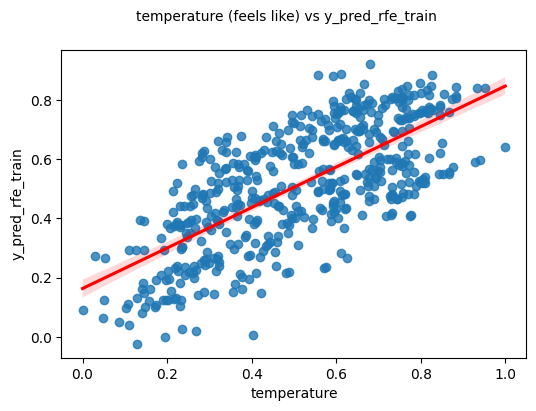

In [88]:
# Plotting temperature and y_pred_train to check linearity

fig = plt.figure(figsize=(6,4))
sns.regplot(X_train_rfe_final.iloc[:,3], y_pred_rfe_train, line_kws={"color": "red"})
fig.suptitle('temperature (feels like) vs y_pred_rfe_train', fontsize=10)
plt.xlabel('temperature', fontsize=10)
plt.ylabel('y_pred_rfe_train', fontsize=10)
plt.show()

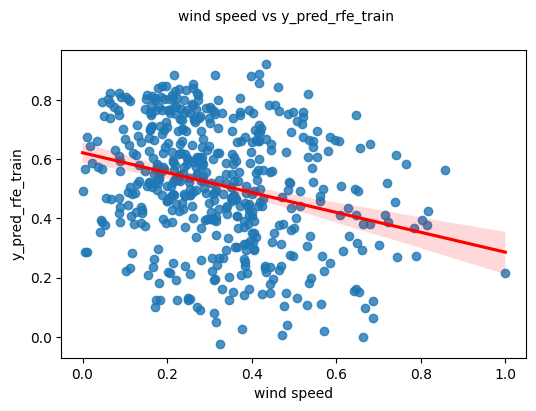

In [89]:
# Plotting wind speed and y_pred_train to check linearity

fig = plt.figure(figsize=(6,4))
sns.regplot(X_train_rfe_final.iloc[:,4], y_pred_rfe_train, line_kws={"color": "red"})
fig.suptitle('wind speed vs y_pred_rfe_train', fontsize=10)
plt.xlabel('wind speed', fontsize=10)
plt.ylabel('y_pred_rfe_train', fontsize=10)
plt.show()

- **we can also observe that the linear regression line between target and temperature**
- **we can also observe that the linear regression line between target and wind speed**

- **hence the assumption of linear relationship between target and atleast one feature is validated**

### Validation of Assumption - Errors are normally distributed around zero mean

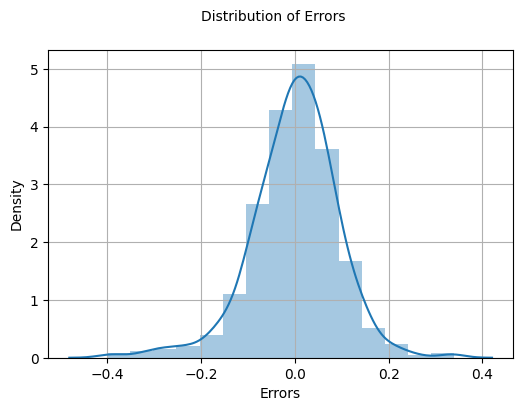

In [90]:
# Plot the histogram of the error terms

fig = plt.figure(figsize=(6,4))
sns.distplot((y_train - y_pred_rfe_train), bins = 15)
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.xlabel('Errors', fontsize = 10)
plt.grid(visible=True)
plt.show()

- **we can observe that the distribution of the residuals is nearly normal with mean very close to zero**
- **hence the assumption of errors being normally distributed around zero mean is validated**

### Validation of Assumption - homoscedasticity (errors have a constant variance and do not have any pattern)

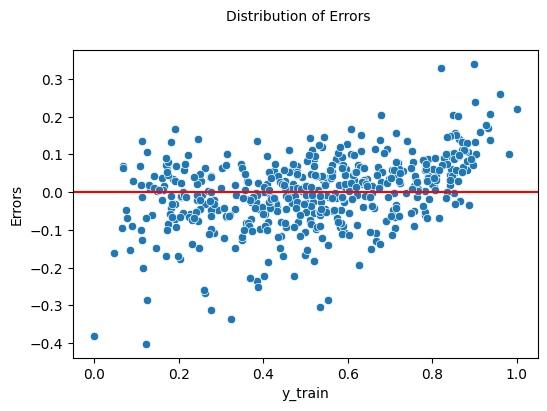

In [91]:
# plot the residuals vs. training target variable

fig = plt.figure(figsize=(6,4))
sns.scatterplot(y_train, (y_train - y_pred_rfe_train))
plt.axhline(0,color='red')
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('y_train', fontsize = 10)
plt.show()

- **we can observe that there is no pattern in the the scatter plot and they are randomly scattered on either side of the horizontal line where error=0**
- **we can also observe that the spread of most of the residuals are uniform around the zero line**

- **hence the assumption of homoscedasticity (errors have a constant variance and do not have any pattern) is validated**

### Validation of Assumption - Absence of Multicolinearity

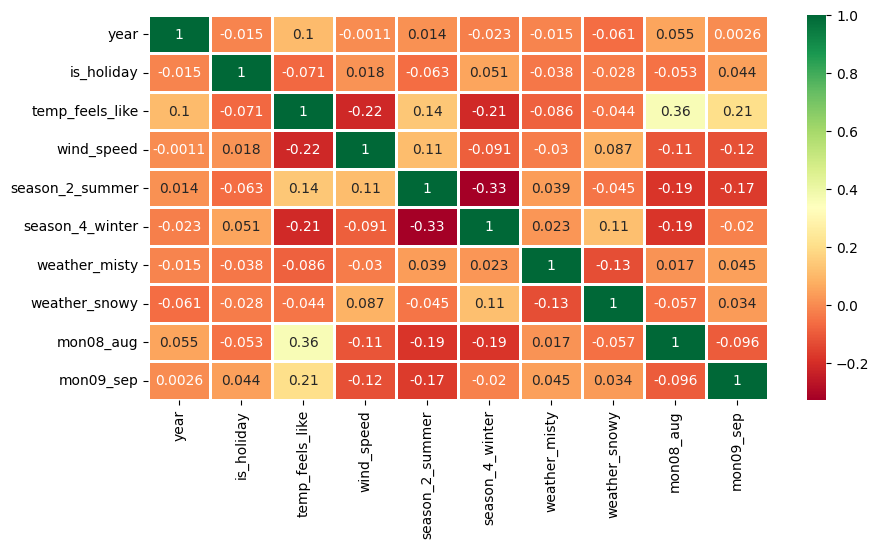

In [92]:
plt.figure(figsize=(10,5))
sns.heatmap(X_train_rfe_final.drop(columns='const').corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

- **we can observe that there is no strong correlation [abs(R) > 0.5] between any features**

- **hence the assumption of Absence of Multicolinearity is validated**

## Prediction on Test Data

In [93]:
feature_list = X_train_rfe_final.columns[~(X_train_rfe_final.columns=='const')]
feature_list

Index(['year', 'is_holiday', 'temp_feels_like', 'wind_speed',
       'season_2_summer', 'season_4_winter', 'weather_misty', 'weather_snowy',
       'mon08_aug', 'mon09_sep'],
      dtype='object')

In [94]:
X_test_sm = X_test[feature_list]

# Adding a constant variable 
X_test_sm = sm.add_constant(X_test_sm)

In [95]:
X_test_sm.head()

,const,year,is_holiday,temp_feels_like,wind_speed,season_2_summer,season_4_winter,weather_misty,weather_snowy,mon08_aug,mon09_sep
184,1.0,0,1,0.769660,0.084219,0,0,1,0,0,0
535,1.0,1,0,0.842587,0.153728,1,0,0,0,0,0
299,1.0,0,0,0.496145,0.334206,0,1,1,0,0,0
221,1.0,0,0,0.795343,0.339570,0,0,0,0,1,0
152,1.0,0,0,0.741471,0.537414,1,0,0,0,0,0


In [96]:
y_pred_test = model_rfe_final.predict(X_test_sm)

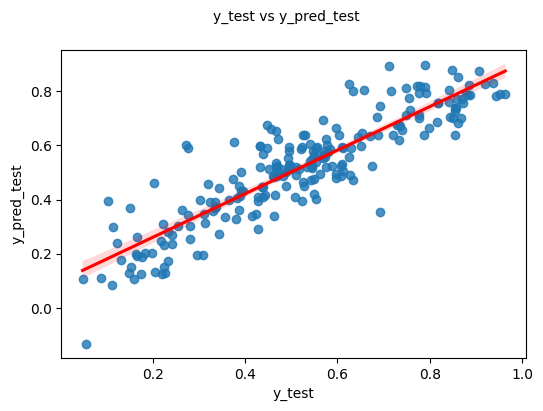

In [97]:
# Plotting y_test and y_pred_test to understand the fit of regression line on test data

fig = plt.figure(figsize=(6,4))
sns.regplot(y_test, y_pred_test, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred_test', fontsize=10)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred_test', fontsize=10)
plt.show()

In [98]:
r_squared = r2_score(y_test, y_pred_test)
print('Accuracy (R^2) on Test Data : {:.2f}'.format(r_squared))

Accuracy (R^2) on Test Data : 0.79


In [99]:
N = len(y_test)
p = len(feature_list)
N, p

(219, 10)

In [100]:
adj_r_squared = 1 - ( (1-r_squared) * (N-1) ) / ( N - p -1 )
print('Accuracy (Adjusted R^2) on Test Data : {:.2f}'.format(adj_r_squared))

Accuracy (Adjusted R^2) on Test Data : 0.78


In [104]:
# Returns the mean squared error; we'll take a square root
# rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred_test)))
# scaling of y should have been done separately to inverse transform the scaled values back to original values

rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error on (scaled) Test Data : {:.2f}'.format(rmse))

Root Mean Squared Error on (scaled) Test Data : 0.10


In [ ]:
# Plot the histogram of the error terms

fig = plt.figure(figsize=(6,4))
sns.distplot((y_test - y_pred_test), bins = 15)
fig.suptitle('Distribution of Errors', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.xlabel('Errors', fontsize = 10)
plt.grid(visible=True)
plt.show()

## Conclusion

### Comparison of R^2 Values

#### TRAINING DATA
- [x] R-squared:                       0.829
- [x] Adj. R-squared:                  0.826

#### TEST DATA
- [x] R-squared:                       0.79
- [x] Adj. R-squared:                  0.78


Model's R-squared and Adj. R-squared scores during Traing and Testing Stages respectively are **comparable**. So there is **no underfitting or overfitting**.

Hence it can be concluded as a good machine learning model with **generalization**.

Prob (F-statistic) is very small, hence the R^2 value is significant and not by chance

**The predictors in the final model equation can explain approx 78% of the variation in any unseen data**

### Model Coefficients

In [ ]:
model_rfe_final.params

### Model Equation

**riders =
0.128027 + 
(year               x 0.233374) *-
(is_holiday         x 0.093901)* +
(temp_feels_like    x 0.536969) *-
(wind_speed         x 0.131954)* +
(season_2_summer    x 0.097789) +
(season_4_winter    x 0.132357) *-
(weather_misty      x 0.083591) *-
(weather_snowy      x 0.276982)* +
(mon08_aug          x 0.067977) +
(mon09_sep          x 0.120748)**



All VIFs < 5, so level of multicollinearity is acceptable

All p-values < 0.05, therefore all coefficients are significant

- Bike demand is likely to increase by **0.23** units every year, provided other features remain unchanged
- Bike demand likely to decrease by by **0.09** units on holidays, provided other features remain unchanged
- Bike demand is likely to increase by **0.54** units for **unit increase in temperature (temp_feels_like)**, provided other features remain unchanged
- Bike demand likely to decrease by **0.13** units for **unit increase in wind speed**, provided other features remain unchanged
- Bike demand is likely to decrease by **0.09** units on misty weather, provided other features remain unchanged
- Bike demand is likely to decrease by **0.28** units on snowy weather, provided other features remain unchanged
- Bike demand is likely to increase by **0.07** units during Aug, provided other features remain unchanged
- Bike demand is likely to increase by **0.12** units during Sep, provided other features remain unchanged 

### Strong Predictors

Top 3 Predictors are :
- [x] temp_feels_like (temperature feels like) positively affects the bike demand. Bike demand is likely to increase by **0.54** units for **unit increase in temperature (temp_feels_like)**, provided other features remain unchanged
- [x] bad weather (snow or heavy snow) negatively affects the bike demand. Bike demand is likely to decrease by **0.28** units on snowy weather, provided other features remain unchanged
- [x] year positively affects the bike demand. Bike demand is likely to increase by **0.23** units every year, provided other features remain unchanged

### Recommendations

- [x] The bike demand is likely to increase every year, the company should accordingly plan its resources (bikes, docking area etc.) predicted based on the Model Equation
- [x] Since the bike demand is not constant through out the year (peaks and troughs due to various multiple factors as explained above) the company can explore rental/ lease arrangement for the bikes to meet the peak demands while maintaining an optimal inventory